# McDo menu nutrition facts
- Data analysis
- Exploratory analysis
- ingridients analysis

installing essential packages

In [124]:
# !pip install numpy
# !pip install pandas
# !pip install requests
# !pip install bs4
# !pip install html5lib
# !pip install plotly
# !pip install pyfetch

Import libraries

In [125]:
import numpy as np # linear algebra
import pandas as pd # data exploratory
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Data processing
<p> Getting data from a DBMS </p>
Dataset source : <a href="https://www.kaggle.com/datasets/mcdonalds/nutrition-facts"> Kaggle <a>


In [126]:
# # DBMS used for this project : DB2 from IBM
# import ibm_db
# import ibm_db_dbi
# # data uploading process : Source => Target => Define => Finalize
# # credential
# # %sql ibm_db_sa://
# # connect to dbms
# ##conn_object = .....
# # retrieving/customize data using SQL query and get specific columns if needs !
# #connection for pandas
# pconn = ibm_db_dbi.Connection(conn)
# #query statement to retrieve all rows in <TARGET> table
# selectQuery = "select * from <TABLE>"
# #retrieve the query results into a pandas dataframe
# pdf = pd.read_sql(selectQuery, pconn)
# #print just the LNAME for first row in the pandas data frame
# pdf



Scrapping dataset from webpage


In [127]:
# url = 'https://www.kaggle.com/datasets/mcdonalds/nutrition-facts'
# html_data = requests.get(url).text
# # html_data

In [128]:
# soup = BeautifulSoup(html_data, 'html5lib')
# # soup

# df = pd.DataFrame(columns=["Category", "Item", "Serving Size", "Calories", "Calories from Fat", "Total Fat", "Total Fat (% Daily Value)", "Saturated Fat", "Saturated Fat (% Daily Value)", "Trans Fat", "Cholesterol", "Cholesterol (% Daily Value)", "Sodium", "Sodium (% Daily Value)", "Carbohydrates", "Carbohydrates (% Daily Value)", "Dietary Fiber", "Dietary Fiber (% Daily Value)", "Sugars", "Protein","Vitamin A (% Daily Value)", "Vitamin C (% Daily Value)", "Calcium (% Daily Value)", "Iron (% Daily Value)"])

# for row in tables[table_index].tbody.find_all("tr"):
#     col = row.find_all("td")
#     if (col != []):
#         rank = col[0].text
#         country = col[1].text
#         population = col[2].text.strip()
#         area = col[3].text.strip()
#         density = col[4].text.strip()
#         df = df.append({"Rank":rank, "Country":country, "Population":population, "Area":area, "Density":density}, ignore_index=True)

# #df
# # cleaning
# df["Revenue"] = df['Revenue'].str.replace(',|\$',"")
# df.dropna(inplace=True)

# df = df[df['Revenue'] != ""]

# df

Download dataset from source webpage 

In [129]:
# pypyodide API #Dont work here ? 

# # from pyodide.http import pyfetch
# import pyfetch as pf

# filename = "link_to_file_location/menu.csv"

# async def download(url, filename):
#     response = await pyfetch(url)
#     if response.status == 200:
#         with open(filename, "wb") as f:
#             f.write(await response.bytes())

# await download(filename, "menu.csv")

# df = pd.read_csv("menu.csv", header=None)

In [130]:
# If working on your local pc w/ jupyter nb
# df = pd.read_csv('/content/drive/MyDrive/Lab/menu.csv', header=None) => columns become numbers!!!
df = pd.read_csv('/content/drive/MyDrive/Lab/menu.csv')
# df.head()

If You to download the dataset from a different source or your personal website 

In [131]:
# ! wget "https://docs.google.com/spreadsheets/d/14mYvEgvEFsvHyeZR7C2A1eS5pxzyPSE-1fJvinoh4pk/edit#gid=859843062"
# !curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

Loading dataset from google drive spreasheet using *gspread*
- Notice that you'll need a google account

In [132]:
# # to acccess the dataset from my googledrive w/ credentials 
##############################################################
# from google.colab import auth
# auth.authenticate_user()

# import gspread
# from google.auth import default
# creds, _ = default()

# gc = gspread.authorize(creds)
#############################################################
# # scope :  https://sheets.google.com.
# # worksheet = gc.open('menu').sheet1
############################################################################
####### Accessing dataset without credentials uncomment the section below ## 
##################################################################~#########
# worksheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/14mYvEgvEFsvHyeZR7C2A1eS5pxzyPSE-1fJvinoh4pk/edit#gid=859843062').sheet1
# # get_all_values gives a list of rows.
# rows = worksheet.get_all_values()
# # print(rows)

# # Convert to a DataFrame and render.
# import pandas as pd
# df = pd.DataFrame.from_records(rows)
# # df.tail()
# df.head()

In [133]:
## Retrieving the first 5 rows

# df.describe()
# df.shape
# df.columns
# df.index
# df.values
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


## Data analysis

Convert retrieved SQL query to DataFrame

In [134]:
# # convert specific columns to a pyhton variables to be monitored
# test_score_distribution = %sql SELECT test_score as "Test Score", count(*) as "Frequency" from INTERNATIONAL_STUDENT_TEST_SCORES GROUP BY test_score;
# # test_score_distribution

# # Convert retrieved query to DF
# df = test_score_distribution.DataFrame()

# # x : ind var and y : Kpi to viz
# # plot = sbn.barplot(x='Test Score', y='Frequency', data=df)
# plot

### Checking the MAX quantity of Sodium in the food
- Main source of sodium is table salt
- Average American eats 5 teaspoons/day
- Sodium mostly added preparation
- Foods that dont taste salty may be high in sodium
- Sodium controls fluid balance in our bodies
- Too much sodium may raise blood pressure

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 63.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 32.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


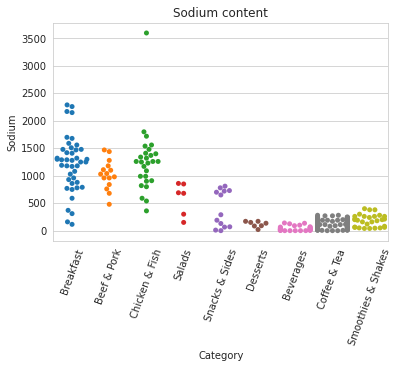

In [135]:
## Which food item has maximum sodium content ? 

### Categoricall scatterplots
plot = sns.swarmplot(x="Category", y="Sodium", data=df)

plt.setp(plot.get_xticklabels(), rotation=70)
plt.title('Sodium content')
plt.show()

In [136]:
# summary statistcs of sodium
df['Sodium'].describe()

count     260.000000
mean      495.750000
std       577.026323
min         0.000000
25%       107.500000
50%       190.000000
75%       865.000000
max      3600.000000
Name: Sodium, dtype: float64

In [137]:
# get the max sodium idx value 

df.at[df['Sodium'].idxmax(), 'Item']

'Chicken McNuggets (40 piece)'

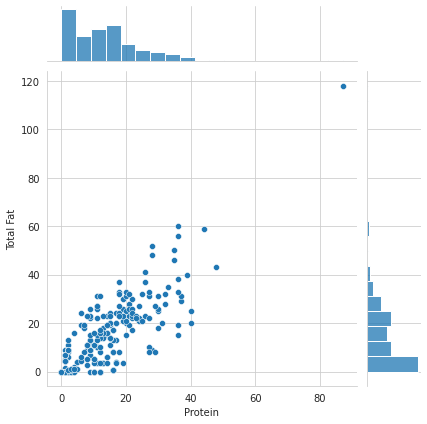

In [138]:
# scatterplot for Total Fat and Protein Correlation 
# there is a correlaction btw them because the highest point and lowest form a straight line
# sns.jointplot(x='Protein', y='Total Fat', data=df)
plot = sns.jointplot(x='Protein', y='Total Fat', data=df)
# plot.show() => AttributeError: 'JointGrid' object has no attribute 'show'
# plot.fig => Should somve this


*Close db From dbms & sql*

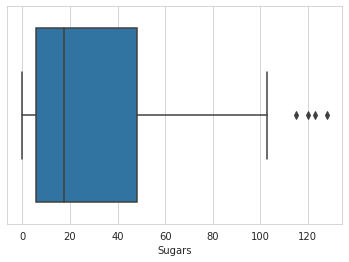

In [139]:
# Level of sugar
plot = sns.set_style("whitegrid")
ax = sns.boxplot(x=df['Sugars'])
# plot.fig

In [140]:
# Close dbms connection
# ibm_db.close(conn)

## History

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-06-16        | 1.0     | Afonso Diela | Created using google Colab |

# <hr>

